In [1]:
%matplotlib notebook
from opensky_api import OpenSkyApi
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
api = OpenSkyApi("aircraft_guy", "aircraft")
states = api.get_states()
print(states.states[1])
#for s in states.states:
#    print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.baro_altitude, s.velocity))

{   'baro_altitude': 60.96,
    'callsign': 'SWR36A  ',
    'geo_altitude': 167.64,
    'heading': 269.55,
    'icao24': '4b1812',
    'last_contact': 1588868899,
    'latitude': 51.4778,
    'longitude': -0.4133,
    'on_ground': False,
    'origin_country': 'Switzerland',
    'position_source': 0,
    'sensors': None,
    'spi': False,
    'squawk': '3042',
    'time_position': 1588868899,
    'velocity': 65.34,
    'vertical_rate': -3.25}


{   'baro_altitude': 2880.36,
    'callsign': 'SWA43   ',
    'geo_altitude': 2895.6,
    'heading': 112.87,
    'icao24': 'aa7718',
    'last_contact': 1588879559,
    'latitude': 39.8761,
    'longitude': -104.5978,
    'on_ground': False,
    'origin_country': 'United States',
    'position_source': 0,
    'sensors': None,
    'spi': False,
    'squawk': '1455',
    'time_position': 1588879559,
    'velocity': 128.41,
    'vertical_rate': 8.13}


<IPython.core.display.Javascript object>


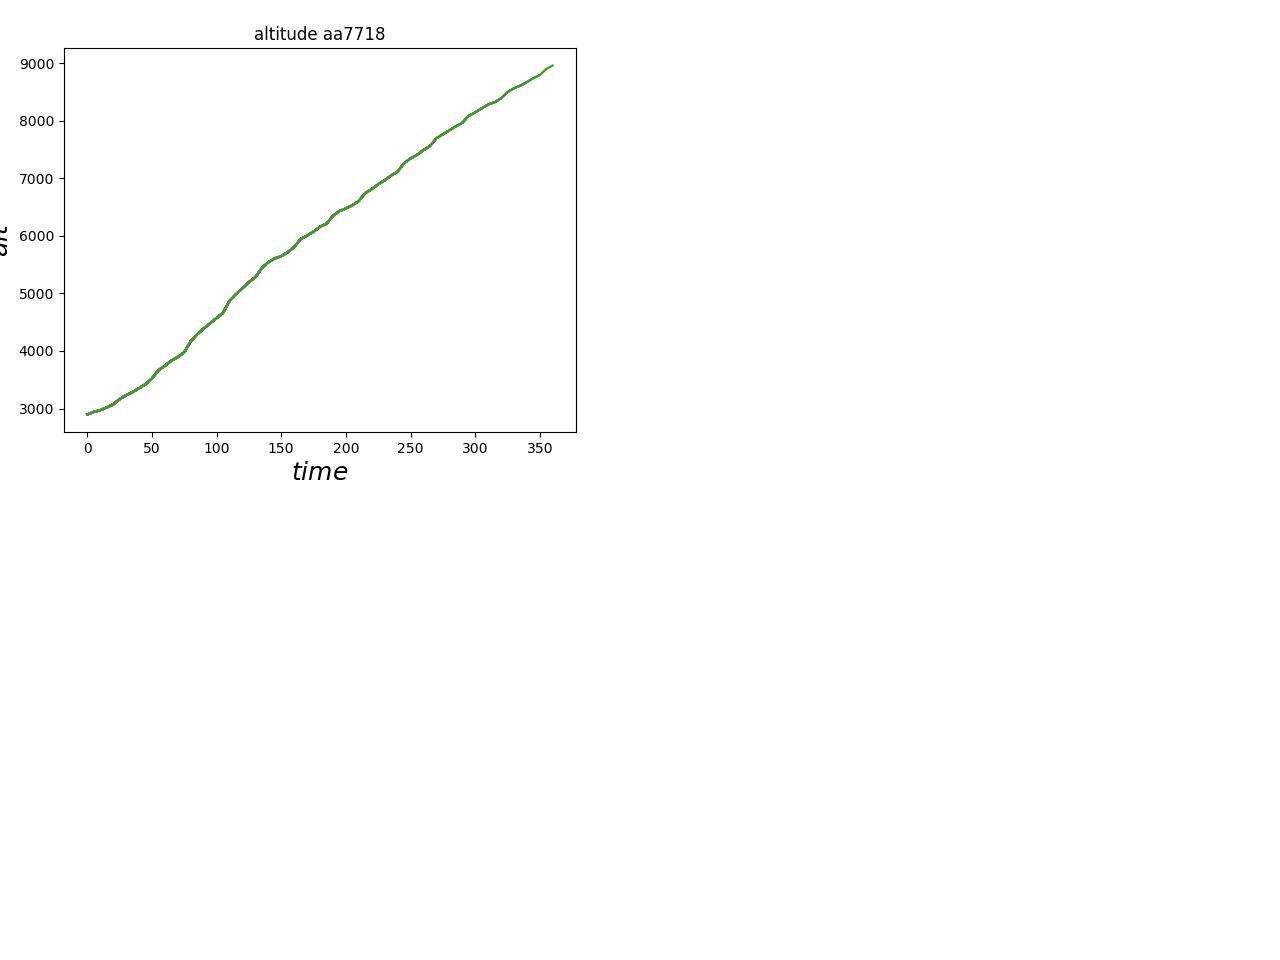

AttributeError: 'NoneType' object has no attribute 'states'

In [40]:
api = OpenSkyApi("aircraft_guy", "aircraft")
# bbox = (min latitude, max latitude, min longitude, max longitude)
colorado = (36.99, 41, -109.045, -102.045)
dia = (39.735674, 39.969581, -104.826092, -104.455969)
states = api.get_states(bbox=dia)
s = np.array(states.states)
print(s[0])
icao = s[0].icao24
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$time$",fontsize=18)
axes.set_ylabel(r"$alt$",fontsize=18)
axes.set_title('altitude {}'.format(icao))
t = np.array([0])
alt = np.array([s[0].geo_altitude])
axes.plot(t, alt, label=r"$alt$")
fig.canvas.draw()
for i in range(5, 10*60, 5):
    time.sleep(5)
    states = api.get_states(icao24 = icao)
    s = np.array(states.states)
    t = np.append(t, i)
    alt = np.append(alt, s[0].geo_altitude)
    axes.plot(t, alt, label=r"$alt$")
    fig.canvas.draw()
